## AUCROC curve of the model performance across the cross-validation, test set, and additional new test set

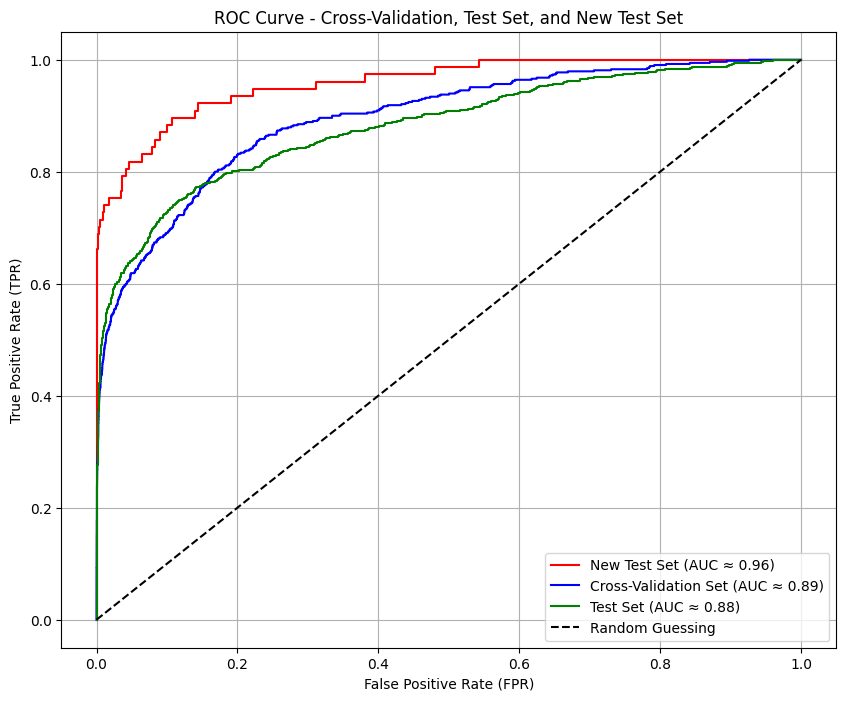

In [1]:
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Load the cross-validation ROC data
with open("C:/jupyter/Malik/Metal Binding/Code/Roc/PATN_RAG__N_Cross_fold_5.pkl", "rb") as f:
    cross_val_data = pickle.load(f)

# Load the test set ROC data
with open("C:/jupyter/Malik/Metal Binding/Code/Roc/PATN_RAG_Test_N.pkl", "rb") as f:
    test_data = pickle.load(f)

# Load the new test set ROC data
with open("C:/jupyter/Malik/Metal Binding/Code/Roc/PATN_New_RAG_N_Test Set.pkl", "rb") as f:
    new_test_data = pickle.load(f)

# Assuming each ROC data has `fpr`, `tpr`, and possibly `thresholds` saved in a dict
fpr_cv, tpr_cv = cross_val_data['fpr'], cross_val_data['tpr']
fpr_test, tpr_test = test_data['fpr'], test_data['tpr']
fpr_new_test, tpr_new_test = new_test_data['fpr'], new_test_data['tpr']

# Calculate AUC for each set
auc_cv = auc(fpr_cv, tpr_cv)
auc_test = auc(fpr_test, tpr_test)
auc_new_test = auc(fpr_new_test, tpr_new_test)

# Plotting
plt.figure(figsize=(10, 8))
plt.plot(fpr_new_test, tpr_new_test, label=f"New Test Set (AUC ≈ {auc_new_test:.2f})", color="red")
plt.plot(fpr_cv, tpr_cv, label=f"Cross-Validation Set (AUC ≈ {auc_cv:.2f})", color="blue")
plt.plot(fpr_test, tpr_test, label=f"Test Set (AUC ≈ {auc_test:.2f})", color="green")

# Plot the diagonal line for random guessing
plt.plot([0, 1], [0, 1], "k--", label="Random Guessing")

# Labeling
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Cross-Validation, Test Set, and New Test Set")
plt.legend(loc="lower right")
plt.grid()

# Save the plot as a high-resolution PNG file
plt.savefig("ROC_RAG_OverAll.png", dpi=300, bbox_inches='tight')

# Show plot
plt.show()

## Embedding Comparasions

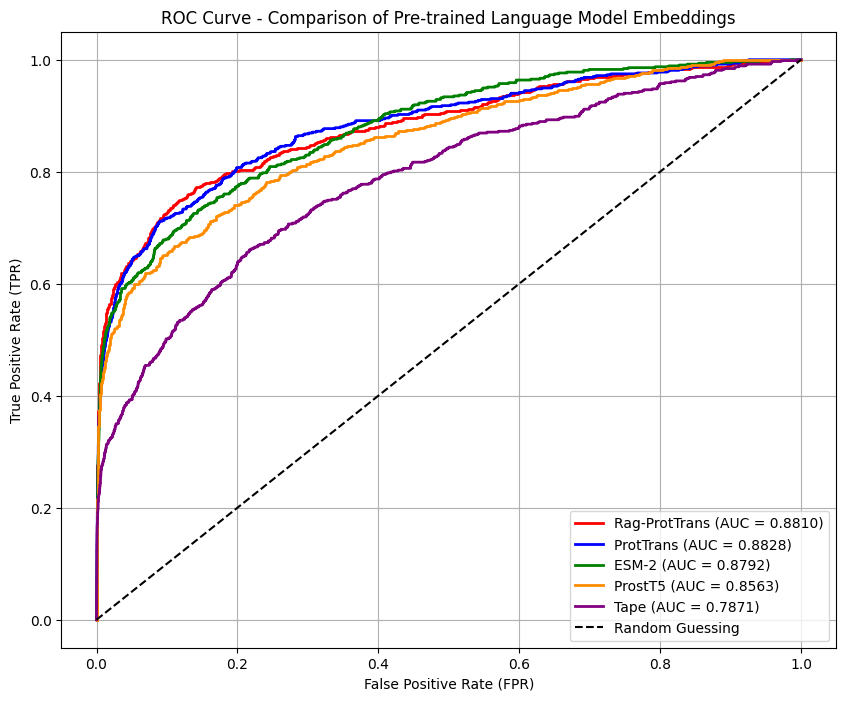

In [2]:
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import auc

# Load ROC data for each embedding model
with open("C:/jupyter/Malik/Metal Binding/Code/Roc/PATN_RAG_Test_N.pkl", "rb") as f:
    rag_prottrans_data = pickle.load(f)  # Added Rag-ProtTrans embedding first

with open("C:/jupyter/Malik/Metal Binding/Code/Roc/PATN_prottrans_indep.pkl", "rb") as f:
    prottrans_data = pickle.load(f)

with open("C:/jupyter/Malik/Metal Binding/Code/Roc/PATN_ESM-2_Indep.pkl", "rb") as f:
    esm2_data = pickle.load(f)

with open("C:/jupyter/Malik/Metal Binding/Code/Roc/PATN_ProstT5_Indep.pkl", "rb") as f:
    prostt5_data = pickle.load(f)

with open("C:/jupyter/Malik/Metal Binding/Code/Roc/PATN_Tape_Indep.pkl", "rb") as f:
    tape_data = pickle.load(f)

# Extract false positive rate (fpr) and true positive rate (tpr) for each model
fpr_rag, tpr_rag = rag_prottrans_data['fpr'], rag_prottrans_data['tpr']  # Added first
fpr_prottrans, tpr_prottrans = prottrans_data['fpr'], prottrans_data['tpr']
fpr_esm2, tpr_esm2 = esm2_data['fpr'], esm2_data['tpr']
fpr_prostt5, tpr_prostt5 = prostt5_data['fpr'], prostt5_data['tpr']
fpr_tape, tpr_tape = tape_data['fpr'], tape_data['tpr']

# Calculate AUC for each model
auc_rag = auc(fpr_rag, tpr_rag)  # AUC for Rag-ProtTrans first
auc_prottrans = auc(fpr_prottrans, tpr_prottrans)
auc_esm2 = auc(fpr_esm2, tpr_esm2)
auc_prostt5 = auc(fpr_prostt5, tpr_prostt5)
auc_tape = auc(fpr_tape, tpr_tape)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_rag, tpr_rag, label=f"Rag-ProtTrans (AUC = {auc_rag:.4f})", color="red", linewidth=2)  # Now in red
plt.plot(fpr_prottrans, tpr_prottrans, label=f"ProtTrans (AUC = {auc_prottrans:.4f})", color="blue", linewidth=2)
plt.plot(fpr_esm2, tpr_esm2, label=f"ESM-2 (AUC = {auc_esm2:.4f})", color="green", linewidth=2)
plt.plot(fpr_prostt5, tpr_prostt5, label=f"ProstT5 (AUC = {auc_prostt5:.4f})", color="darkorange", linewidth=2)  # Adjusted to dark orange
plt.plot(fpr_tape, tpr_tape, label=f"Tape (AUC = {auc_tape:.4f})", color="purple", linewidth=2)

# Plot the diagonal line for random guessing
plt.plot([0, 1], [0, 1], "k--", label="Random Guessing", linewidth=1.5)

# Labeling
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Comparison of Pre-trained Language Model Embeddings")
plt.legend(loc="lower right")
plt.grid()

# Save the plot with high resolution
plt.savefig("ROC_Rag_Embeddings_Comparison.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

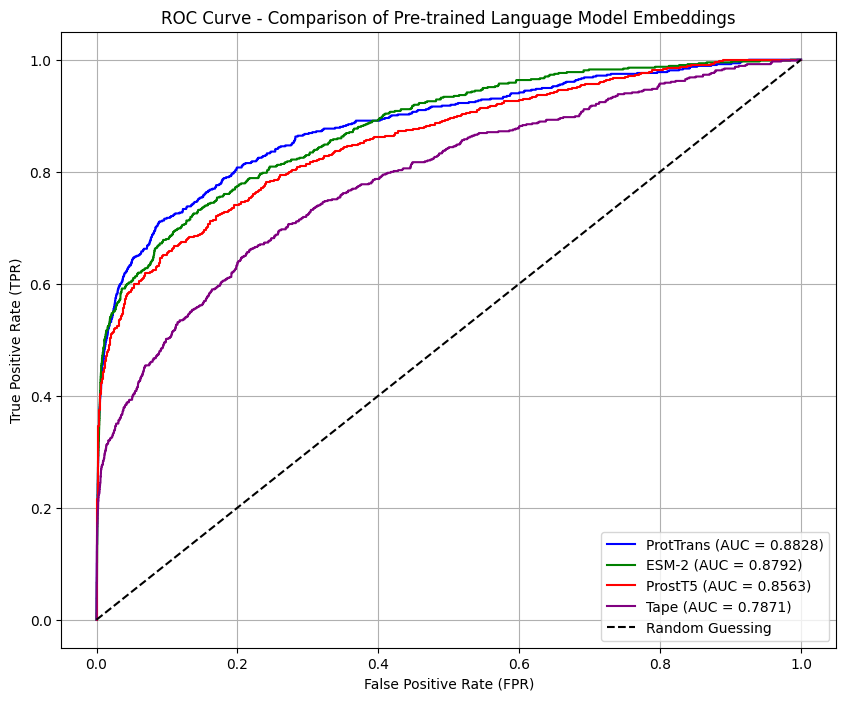

In [5]:
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import auc

# Load ROC data for each embedding model
with open("C:/jupyter/Malik/Metal Binding/Code/Roc/PATN_prottrans_indep.pkl", "rb") as f:
    prottrans_data = pickle.load(f)

with open("C:/jupyter/Malik/Metal Binding/Code/Roc/PATN_ESM-2_Indep.pkl", "rb") as f:
    esm2_data = pickle.load(f)

with open("C:/jupyter/Malik/Metal Binding/Code/Roc/PATN_ProstT5_Indep.pkl", "rb") as f:
    prostt5_data = pickle.load(f)

with open("C:/jupyter/Malik/Metal Binding/Code/Roc/PATN_Tape_Indep.pkl", "rb") as f:
    tape_data = pickle.load(f)

# Extract false positive rate (fpr) and true positive rate (tpr) for each model
fpr_prottrans, tpr_prottrans = prottrans_data['fpr'], prottrans_data['tpr']
fpr_esm2, tpr_esm2 = esm2_data['fpr'], esm2_data['tpr']
fpr_prostt5, tpr_prostt5 = prostt5_data['fpr'], prostt5_data['tpr']
fpr_tape, tpr_tape = tape_data['fpr'], tape_data['tpr']

# Calculate AUC for each model
auc_prottrans = auc(fpr_prottrans, tpr_prottrans)
auc_esm2 = auc(fpr_esm2, tpr_esm2)
auc_prostt5 = auc(fpr_prostt5, tpr_prostt5)
auc_tape = auc(fpr_tape, tpr_tape)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_prottrans, tpr_prottrans, label=f"ProtTrans (AUC = {auc_prottrans:.4f})", color="blue")
plt.plot(fpr_esm2, tpr_esm2, label=f"ESM-2 (AUC = {auc_esm2:.4f})", color="green")
plt.plot(fpr_prostt5, tpr_prostt5, label=f"ProstT5 (AUC = {auc_prostt5:.4f})", color="red")
plt.plot(fpr_tape, tpr_tape, label=f"Tape (AUC = {auc_tape:.4f})", color="purple")

# Plot the diagonal line for random guessing
plt.plot([0, 1], [0, 1], "k--", label="Random Guessing")

# Labeling
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Comparison of Pre-trained Language Model Embeddings")
plt.legend(loc="lower right")
plt.grid()

# Save the plot with high resolution
plt.savefig("ROC_Curve_Embeddings_Comparison.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()


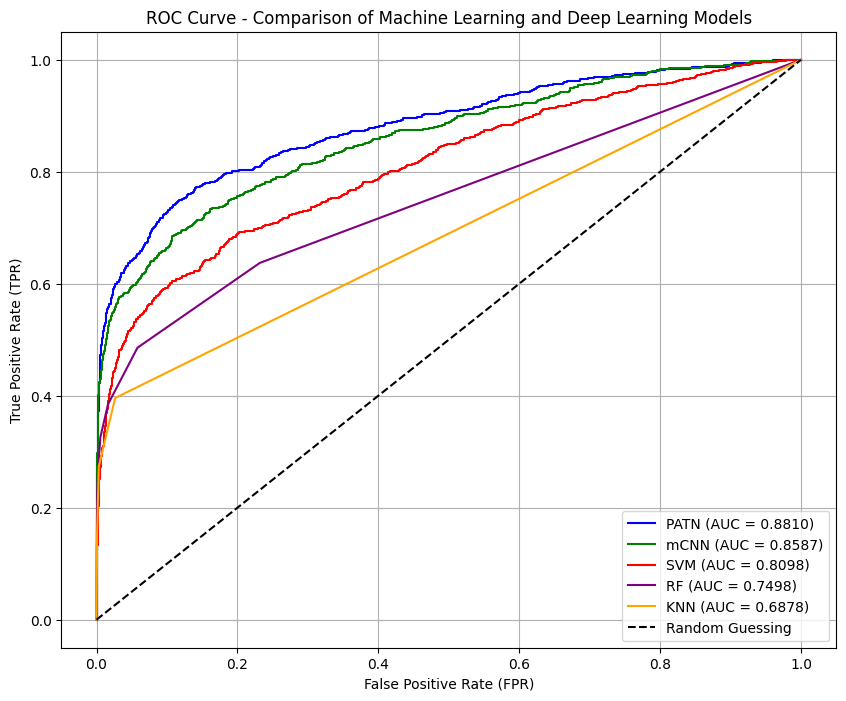

In [5]:
import pickle
import matplotlib.pyplot as plt
from sklearn.metrics import auc

# Load ROC data for each model
with open("C:/jupyter/Malik/Metal Binding/Code/Roc/PATN_RAG_Test_N.pkl", "rb") as f:
    patn_data = pickle.load(f)

with open("C:/jupyter/Malik/Metal Binding/Code/Roc/mCNN_Rag_N.pkl", "rb") as f:
    mcnn_data = pickle.load(f)

with open("C:/jupyter/Malik/Metal Binding/Code/Roc/LinearSVC_roc_values.pkl", "rb") as f:
    svm_data = pickle.load(f)

with open("C:/jupyter/Malik/Metal Binding/Code/Roc/RF_roc_values.pkl", "rb") as f:
    rf_data = pickle.load(f)

with open("C:/jupyter/Malik/Metal Binding/Code/Roc/KNN_roc_values.pkl", "rb") as f:
    knn_data = pickle.load(f)

# Extract false positive rate (fpr) and true positive rate (tpr) for each model
fpr_patn, tpr_patn = patn_data['fpr'], patn_data['tpr']
fpr_mcnn, tpr_mcnn = mcnn_data['fpr'], mcnn_data['tpr']
fpr_svm, tpr_svm = svm_data['fpr'], svm_data['tpr']
fpr_rf, tpr_rf = rf_data['fpr'], rf_data['tpr']
fpr_knn, tpr_knn = knn_data['fpr'], knn_data['tpr']

# Calculate AUC for each model
auc_patn = auc(fpr_patn, tpr_patn)
auc_mcnn = auc(fpr_mcnn, tpr_mcnn)
auc_svm = auc(fpr_svm, tpr_svm)
auc_rf = auc(fpr_rf, tpr_rf)
auc_knn = auc(fpr_knn, tpr_knn)

# Plot ROC curves
plt.figure(figsize=(10, 8))
plt.plot(fpr_patn, tpr_patn, label=f"PATN (AUC = {auc_patn:.4f})", color="blue")
plt.plot(fpr_mcnn, tpr_mcnn, label=f"mCNN (AUC = {auc_mcnn:.4f})", color="green")
plt.plot(fpr_svm, tpr_svm, label=f"SVM (AUC = {auc_svm:.4f})", color="red")
plt.plot(fpr_rf, tpr_rf, label=f"RF (AUC = {auc_rf:.4f})", color="purple")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.4f})", color="orange")

# Plot the diagonal line for random guessing
plt.plot([0, 1], [0, 1], "k--", label="Random Guessing")

# Labeling
plt.xlabel("False Positive Rate (FPR)")
plt.ylabel("True Positive Rate (TPR)")
plt.title("ROC Curve - Comparison of Machine Learning and Deep Learning Models")
plt.legend(loc="lower right")
plt.grid()

# Save the plot with high resolution
plt.savefig("ROC_Rag_Models_Comparison.png", dpi=300, bbox_inches='tight')

# Show the plot
plt.show()